In [1]:
import pandas as pd

data = pd.read_csv("lang_clase.csv")
print(data.shape)
data.sample(5)

(1000, 1)


,Text
346,o canal a cabo fx começou a transmitir o progr...
285,coc netherlands — голландская лгбт-организация...
634,prepotto é uma comuna italiana da região do fr...
546,anna es una chica que se mudo de europa probab...
923,британское военное министерство впервые прояви...


In [2]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d]+", " ", texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(data.Text.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns = tfidf_vect.get_feature_names())
tfidf_matrix

,ab,abaixo,abandonada,abandonado,abandonados,abandonné,abandono,abandonou,abandonó,abarca,...,استاد,عيسى,ὅμοιος,ℝm,ℝn,日本資本主義発達史講座,普化禪,服部緑地都市緑化植物園,아이언,키드
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [4]:
ks = []
k_inertias = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    k_inertia = kmeans.inertia_
    
    ks.append(k)
    k_inertias.append(k_inertia)

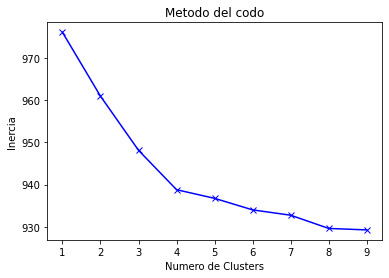

In [5]:
plt.xlabel("Numero de Clusters")
plt.ylabel("Inercia")
plt.title("Metodo del codo")
plt.plot(ks, k_inertias, 'bx-')
plt.show()

In [6]:
k = 4
model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)

KMeans(n_clusters=4)

In [7]:
data["cluster"] = model.labels_
data.sample(10)

,Text,cluster
513,marie instalou residência em enquanto os trab...,1
984,según el censo de []​ había personas residien...,3
24,tipo de material – material com viscosidade ma...,1
93,istván ha dirigido como árbitro en la nb prime...,3
586,el de diciembre de el capitán juan pardo y o...,3
213,le recrutement externe est employé lorsque len...,0
166,"calcona e os compostos relacionados ""calconóid...",1
922,joan aiken née le septembre à rye dans le co...,0
346,o canal a cabo fx começou a transmitir o progr...,1
75,первой их совместной группой стала the primiti...,2


In [8]:
nbrs = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(tfidf_matrix.values)

clust_cnt = data['cluster'].value_counts()
clust_cnt_pct = data['cluster'].value_counts(normalize=True)

centroids = model.cluster_centers_

terms = tfidf_vect.get_feature_names()
order_centroids = centroids.argsort()[:, ::-1]

for i in range(k):
    print(f"Cluster # {i}")
    print(f"Tiene {clust_cnt[i]} registros ({clust_cnt_pct[i]:.2%} de los datos)")
    print()
    
    print("TÉRMINOS MÁS REPRESENTATIVOS")
    for ind in order_centroids[i][:20]:
        print(terms[ind], end=" ")
    print()
    print()
    
    print(f"DOCUMENTOS MÁS REPRESENTATIVOS")
    for vecino in data.iloc[nbrs.kneighbors([centroids[i]])[1][0]].Text.values:
        print(f" *** {vecino}")
        print()
        
    print()
    print("********************************************")
    print()

Cluster # 0
Tiene 228 registros (22.80% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
de le et la les du des en est dans une par au il un avec pour qui france sur 

DOCUMENTOS MÁS REPRESENTATIVOS
 *** le rugby est en france le deuxième sport collectif le plus populaire même si dans certaines régions il fait jeu égal avec le football les régions du sud-ouest sont celles où ce sport est le plus pratiqué et suivi tandis quau nord de lhexagone il est beaucoup moins populaire hormis en île-de-france il ny a aucun club de la moitié nord de la france ayant un statut professionnel en  depuis larrivée du professionnalisme dans le monde du rugby - la majorité des nations majeures dans ce sport ont choisi de regrouper les clubs en provinces franchisées en france les clubs sont très populaires et font partie du patrimoine culturel la france est aujourdhui la seule nation avec langleterre à avoir gardé son système de promotionrelégation dans le championnat délite voici le palmarès du championnat de f

In [15]:
clusters = {0: 'Francés',
            1: "Portugués",
            2: 'Ruso',
            3: 'Español'}

data['nombres_clusters'] = data['cluster'].apply(lambda val: clusters[val])
data.sample(5)

,Text,cluster,nombres_clusters
805,ustad isa استاد عيسى traducido como maestro is...,2,Ruso
651,una hembra de ácaro del queso puede poner hast...,3,Español
900,г первоначальное издание с подзаголовком «мат...,2,Ruso
309,my name is earl era situada no fictício condad...,1,Portugués
273,as criticas aos vídeos assistidos pelos rapaze...,1,Portugués


In [16]:
df_centroids = pd.DataFrame(centroids)
df_centroids['cluster'] = clusters.values()
df_centroids

,0,1,2,3,4,5,6,7,8,9,...,20448,20449,20450,20451,20452,20453,20454,20455,20456,cluster
0,5.684431e-04,2.710505e-20,-4.065758e-20,4.065758e-20,8.131516e-20,9.059643e-04,-1.626303e-19,-8.131516e-20,2.710505e-20,2.439455e-19,...,1.626303e-19,2.710505e-20,7.866307e-04,7.866307e-04,6.484695e-04,-5.421011e-20,0.000000e+00,1.897354e-19,1.897354e-19,Francés
1,-8.673617e-19,3.998609e-04,2.544488e-04,4.065758e-20,2.718222e-04,-5.421011e-20,-1.626303e-19,4.436462e-04,4.065758e-20,2.439455e-19,...,1.897354e-19,-2.710505e-20,1.355253e-19,1.355253e-19,-1.355253e-19,5.536082e-04,-2.710505e-20,1.897354e-19,1.897354e-19,Portugués
2,2.389265e-03,6.776264e-20,0.000000e+00,4.065758e-20,8.131516e-20,-2.710505e-20,-1.626303e-19,-8.131516e-20,8.131516e-20,2.439455e-19,...,7.546527e-04,-1.084202e-19,1.897354e-19,1.897354e-19,-1.355253e-19,-8.131516e-20,2.710505e-20,1.897354e-19,1.897354e-19,Ruso
3,-9.757820e-19,4.065758e-20,-2.710505e-20,3.439314e-04,8.131516e-20,-2.710505e-20,4.987502e-04,-8.131516e-20,3.288860e-04,7.900106e-04,...,1.897354e-19,5.034074e-04,1.897354e-19,1.897354e-19,-1.355253e-19,-8.131516e-20,8.939954e-04,5.084198e-04,5.084198e-04,Español


In [13]:
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from plotly.offline import iplot

In [18]:
pca = PCA(n_components=2)

result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = data.nombres_clusters.values
result['texto'] = data.Text.apply(lambda val: val[:140])

colorsIdx = {'Ruso': 'blue',
             'Español': 'yellow',
             'Portugués': 'green',
             'Francés': 'red'}

result['colores'] = result['cluster'].map(colorsIdx)


result.head()

,X,Y,cluster,texto,colores
0,-0.091922,-0.062548,Portugués,a cada etapa do circuito brasileiro banco do b...,green
1,-0.129491,0.015921,Ruso,мини-бар — небольшой холодильник с напитками п...,blue
2,-0.135561,0.016842,Ruso,ломоносов м в «письмо и и шувалову от года» ...,blue
3,0.104762,0.212235,Francés,en les cultivateurs du village se cotisèrent ...,red
4,0.193633,-0.095641,Español,en el momento de la compra la tarjeta se entre...,yellow


In [19]:
trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['texto'].values,
                   mode='markers',
                   marker=dict(color=result['colores'].values)) 

layout = go.Layout(title="PCA")

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

In [20]:
nuevo = ["El vecino de la profesora puso música esta tarde", 
         "Bom dia pessoal, o Brasil é o melhor pais do mundo",
         "La serie Game of Thrones ganó en los TV Awards of Los Angeles",
         "Bom dia meus caros amigos, buenos días mis queridos amigos"]
nuevo_trans = tfidf_vect.transform(nuevo)
[clusters[i] for i in model.predict(nuevo_trans)]


['Español', 'Portugués', 'Español', 'Ruso']